<a href="https://colab.research.google.com/github/Mohamed-Elshlakany/Machine-Learning-and-Data-analysis/blob/main/marketing_analysis_for_Nova_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_excel('/content/01JBGZGXYR5HY69H1J6C220CQS.xlsx')

In [ ]:
df.head()

,Campaign_ID,Campaign_Name,Marketing_Channel,Start_Date,End_Date,Impressions,Clicks,Conversions,Total_Spend,Revenue_Generated,Location,Age_Group,Gender
0,CMP1,Customer Appreciation Week,Social Media,2023-01-15,2024-04-25,39999.7,5950.8,3906.3,4198.939,16094.217,Alba Iulia,18-24,Male
1,CMP2,Fresh Finds,Social Media,2023-03-04,2024-05-12,59539.9,5994.3,5736.2,12894.357,31359.933,Alba Iulia,18-24,Male
2,CMP3,Trending Now,Email,2023-01-09,2024-04-07,23107.2,13583.6,13293.6,6087.187,8867.504,Brăila,55+,Female
3,CMP4,Shop Smart,Email,2023-02-04,2024-04-26,72856.7,38335.1,5495.5,8023.894,29994.236,Brăila,25-34,Male
4,CMP5,Customer Appreciation Week,Email,2023-08-18,2024-11-04,7305.1,5086.6,4634.2,4226.344,6413.031,Brăila,55+,Male


In [ ]:
df.describe()

,Start_Date,End_Date,Impressions,Clicks,Conversions,Total_Spend,Revenue_Generated
count,2000,2000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2023-03-22 18:20:09.600000,2024-06-13 12:40:19.200000,72674.12180,36504.962200,18356.685350,7392.460920,19232.201005
min,2022-10-25 00:00:00,2024-01-06 00:00:00,2934.80000,307.400000,5.800000,291.885000,430.882000
25%,2023-01-06 00:00:00,2024-03-30 00:00:00,36566.10000,10051.400000,2858.675000,3829.181750,8863.567250
50%,2023-03-24 00:00:00,2024-06-14 00:00:00,72703.00000,27855.950000,9822.300000,7431.279000,17427.245500
75%,2023-06-07 00:00:00,2024-08-28 00:00:00,107777.05000,56070.050000,25513.475000,10904.000000,27299.882250
max,2023-08-19 00:00:00,2024-11-23 00:00:00,144808.60000,140313.600000,128307.600000,14499.391000,57621.811000
std,NaN,NaN,41014.65872,31382.393982,21793.701779,4069.263932,12546.340856


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Campaign_ID        2000 non-null   object        
 1   Campaign_Name      2000 non-null   object        
 2   Marketing_Channel  2000 non-null   object        
 3   Start_Date         2000 non-null   datetime64[ns]
 4   End_Date           2000 non-null   datetime64[ns]
 5   Impressions        2000 non-null   float64       
 6   Clicks             2000 non-null   float64       
 7   Conversions        2000 non-null   float64       
 8   Total_Spend        2000 non-null   float64       
 9   Revenue_Generated  2000 non-null   float64       
 10  Location           2000 non-null   object        
 11  Age_Group          2000 non-null   object        
 12  Gender             2000 non-null   object        
dtypes: datetime64[ns](2), float64(5), object(6)
memory usage: 203.2

In [ ]:
df.isnull().sum()

,0
Campaign_ID,0
Campaign_Name,0
Marketing_Channel,0
Start_Date,0
End_Date,0
Impressions,0
Clicks,0
Conversions,0
Total_Spend,0
Revenue_Generated,0


In [ ]:
df.columns

Index(['Campaign_ID', 'Campaign_Name', 'Marketing_Channel', 'Start_Date',
       'End_Date', 'Impressions', 'Clicks', 'Conversions', 'Total_Spend',
       'Revenue_Generated', 'Location', 'Age_Group', 'Gender'],
      dtype='object')

In [ ]:
df.shape

(2000, 13)

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Calculating key metrics
df['CTR']=df['Clicks']/df['Impressions']*100
df['CPC']=df['Total_Spend']/df['Clicks']
df['CPA']=df['Total_Spend']/df['Conversions']
df['ROAS']=df['Revenue_Generated']/df['Total_Spend']

In [ ]:
# Display the DataFrame with calculated metrics
print(df[['Marketing_Channel','Conversions','CTR','CPC','ROAS']])

         Marketing_Channel  Conversions        CTR       CPC      ROAS
0             Social Media       3906.3  14.877112  0.705609  3.832925
1             Social Media       5736.2  10.067702  2.151103  2.432066
2                    Email      13293.6  58.785141  0.448128  1.456749
3                    Email       5495.5  52.617124  0.209309  3.738115
4                    Email       4634.2  69.630806  0.830878  1.517394
...                    ...          ...        ...       ...       ...
1995  Influencer Marketing      22005.2  90.846616  0.035256  3.913050
1996          Social Media      14079.5  37.818123  0.285746  2.729663
1997                 Email       5660.8  91.167812  0.560845  1.491154
1998          Social Media      76212.0  74.690275  0.149661  2.703137
1999          Social Media        730.8  30.659387  5.441973  3.027954

[2000 rows x 5 columns]


In [ ]:
# Highlighting best-performing channels based on conversion rate and ROAS
best_conversion=df.loc[df['Conversions'].idxmax()]
best_roas=df.loc[df['ROAS'].idxmax()]
print(f"Best Performing Channel by Conversions: {best_conversion['Marketing_Channel']} with {best_conversion['Conversions']} conversions")
print(f"Best Performing Channel by ROAS: {best_roas['Marketing_Channel']} with an ROAS of {best_roas['ROAS']}")

Best Performing Channel by Conversions: Paid Ads with 128307.59999999999 conversions
Best Performing Channel by ROAS: Influencer Marketing with an ROAS of 3.997877281092016


Underperforming Channels (High Costs, Low ROAS):
Empty DataFrame
Columns: [Marketing_Channel, Total_Spend, ROAS]
Index: []


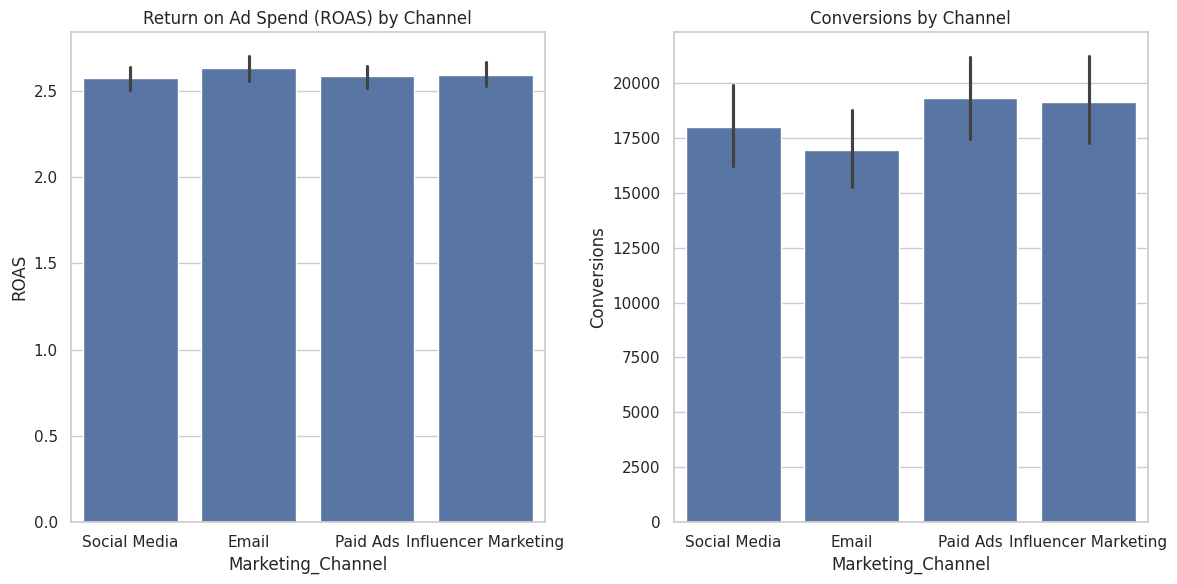

In [ ]:
# Identification channels with high costs and low ROAS
low_roas_threshold = 0.05
underperforming_channels = df[df['ROAS'] < low_roas_threshold]
print("Underperforming Channels (High Costs, Low ROAS):")
print(underperforming_channels[['Marketing_Channel', 'Total_Spend', 'ROAS']])
# Visualize channel performance
plt.figure(figsize=(12, 6))
# Bar plot for ROAS
plt.subplot(1, 2, 1)
sns.barplot(x='Marketing_Channel', y='ROAS', data=df)
plt.title('Return on Ad Spend (ROAS) by Channel')
plt.ylabel('ROAS')
# Bar plot for Conversion Rate
plt.subplot(1, 2, 2)
sns.barplot(x='Marketing_Channel', y='Conversions', data=df)
plt.title('Conversions by Channel')
plt.ylabel('Conversions')
plt.tight_layout()
plt.show()

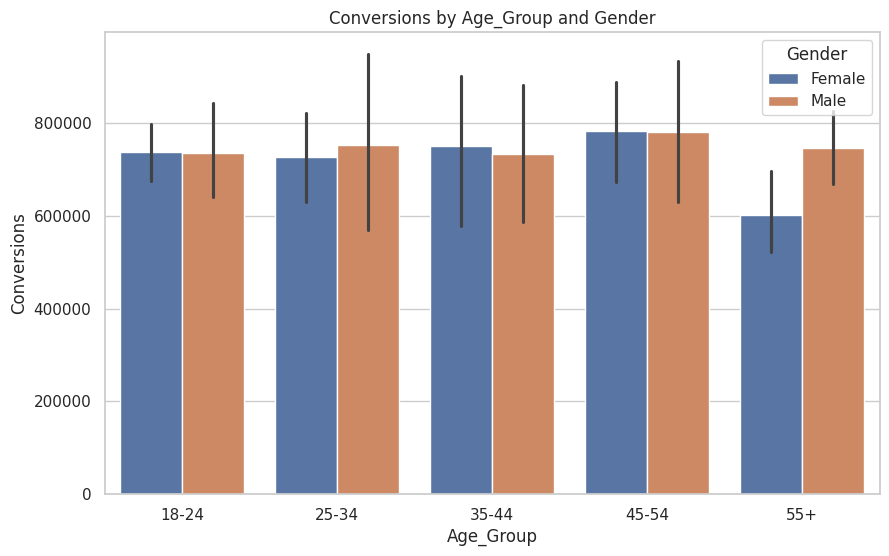

In [ ]:
# Demographic analysis
demographic_data = df.groupby(['Age_Group','Gender','Location']).agg({'Conversions': 'sum', 'Revenue_Generated': 'sum'}).reset_index()
# Visualize demographic insights
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Conversions', hue='Gender', data=demographic_data)
plt.title('Conversions by Age_Group and Gender')
plt.ylabel('Conversions')
plt.show()

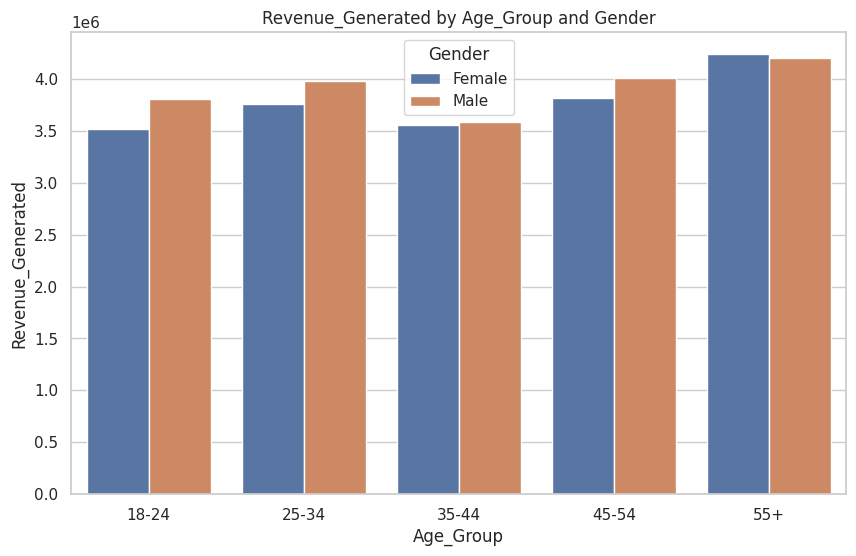

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Revenue_Generated', hue='Gender', data=demographic_data)
plt.title('Revenue_Generated by Age_Group and Gender')
plt.ylabel('Revenue_Generated')
plt.show()

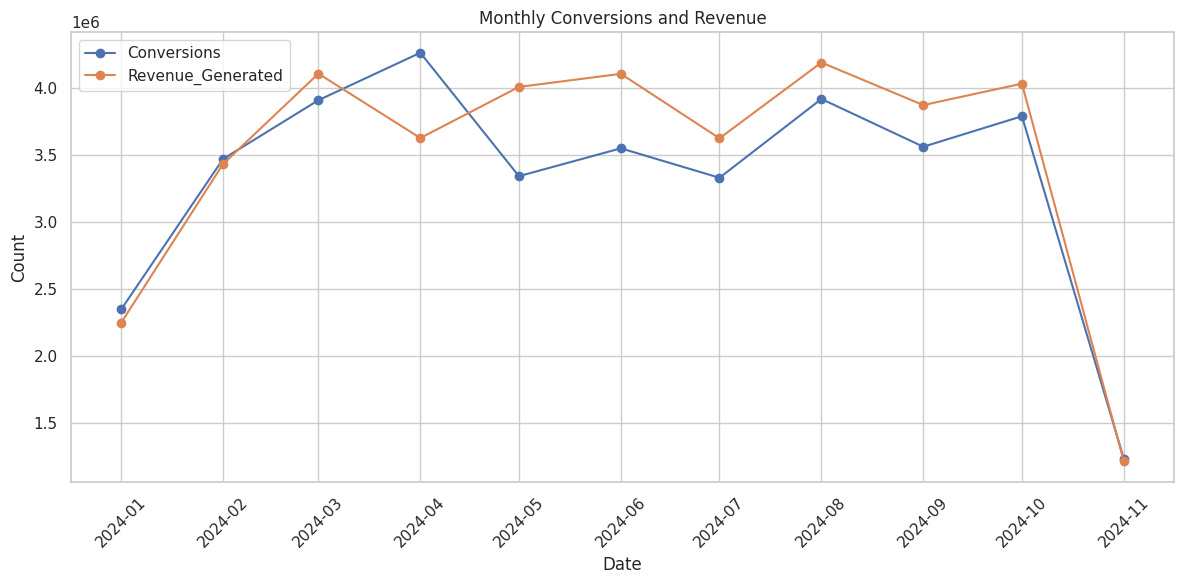

In [ ]:
# Time-based analysis
# Group by month and sum metrics for visualization
time_based_data = df.groupby(df['End_Date'].dt.to_period("M")).agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Conversions': 'sum',
    'Total_Spend': 'sum',
    'Revenue_Generated': 'sum'
}).reset_index()
# Visualize time-based performance
plt.figure(figsize=(12, 6))
plt.plot(time_based_data['End_Date'].dt.to_timestamp(), time_based_data['Conversions'], marker='o', label='Conversions')
plt.plot(time_based_data['End_Date'].dt.to_timestamp(), time_based_data['Revenue_Generated'], marker='o', label='Revenue_Generated')
plt.title('Monthly Conversions and Revenue')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# KPIs Summary
total_impressions = df['Impressions'].sum()
total_clicks = df['Clicks'].sum()
total_conversions = df['Conversions'].sum()
total_spend = df['Total_Spend'].sum()
total_revenue = df['Revenue_Generated'].sum()
average_ctr = df['CTR'].mean()
average_roas = df['ROAS'].mean()
print("KPIs Summary:")
print(f"Total Impressions: {total_impressions}")
print(f"Total Clicks: {total_clicks}")
print(f"Total Conversions: {total_conversions}")
print(f"Total Spend: {total_spend}")
print(f"Total Revenue: {total_revenue}")
print(f"Average CTR: {average_ctr:.2f}%")
print(f"Average ROAS: {average_roas:.2f}")

KPIs Summary:
Total Impressions: 145348243.60000002
Total Clicks: 73009924.4
Total Conversions: 36713370.7
Total Spend: 14784921.839
Total Revenue: 38464402.01
Average CTR: 50.32%
Average ROAS: 2.60


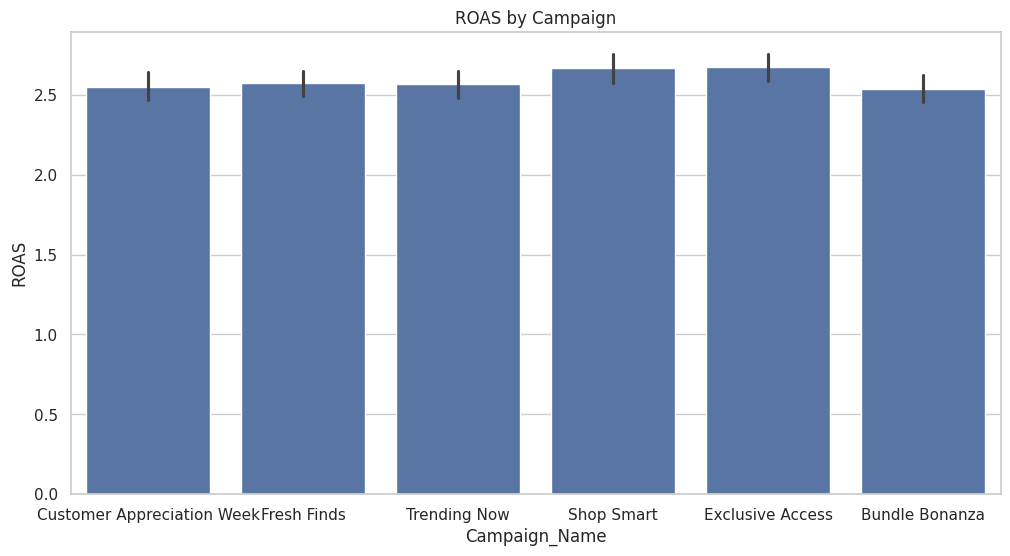

In [ ]:
# Campaign Performance Overview
plt.figure(figsize=(12, 6))
sns.barplot(x='Campaign_Name', y='ROAS', data=df)
plt.title('ROAS by Campaign')
plt.ylabel('ROAS')
plt.show()

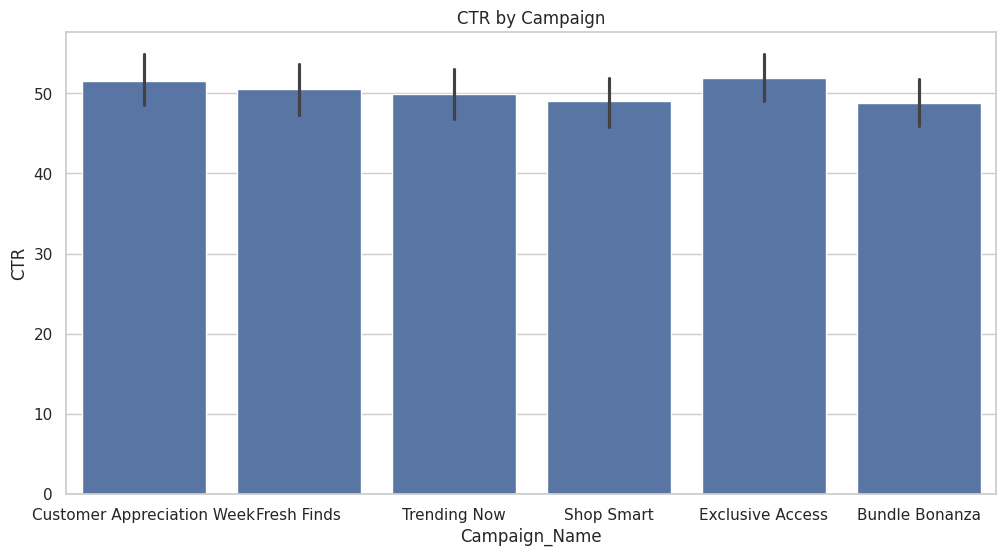

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Campaign_Name', y='CTR', data=df)
plt.title('CTR by Campaign')
plt.ylabel('CTR')
plt.show()

<Figure size 1200x600 with 0 Axes>

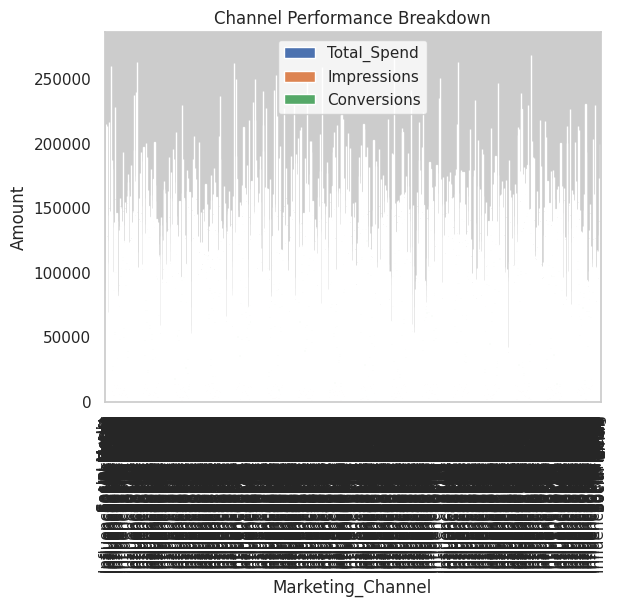

In [ ]:
# Channel Performance Breakdown
plt.figure(figsize=(12, 6))
df.set_index('Marketing_Channel')[['Total_Spend', 'Impressions', 'Conversions']].plot(kind='bar', stacked=True)
plt.title('Channel Performance Breakdown')
plt.ylabel('Amount')
plt.show()

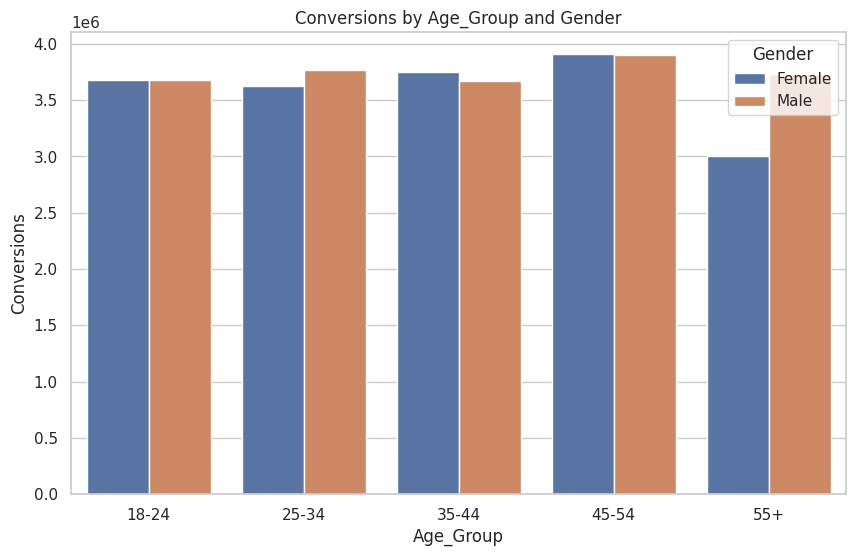

In [ ]:
# Demographics Insights
demographic_data = df.groupby(['Age_Group', 'Gender']).agg({'Conversions': 'sum', 'Revenue_Generated': 'sum'}).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Conversions', hue='Gender', data=demographic_data)
plt.title('Conversions by Age_Group and Gender')
plt.ylabel('Conversions')
plt.show()

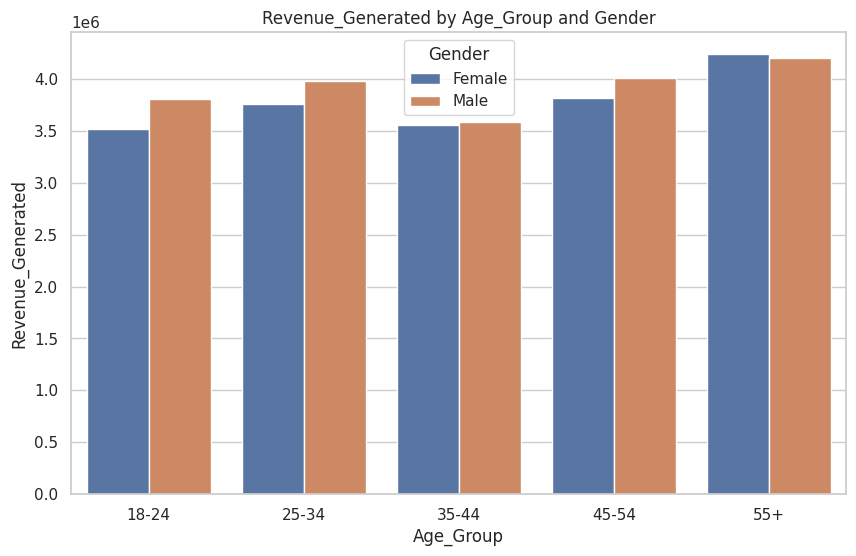

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Revenue_Generated', hue='Gender', data=demographic_data)
plt.title('Revenue_Generated by Age_Group and Gender')
plt.ylabel('Revenue_Generated')
plt.show()

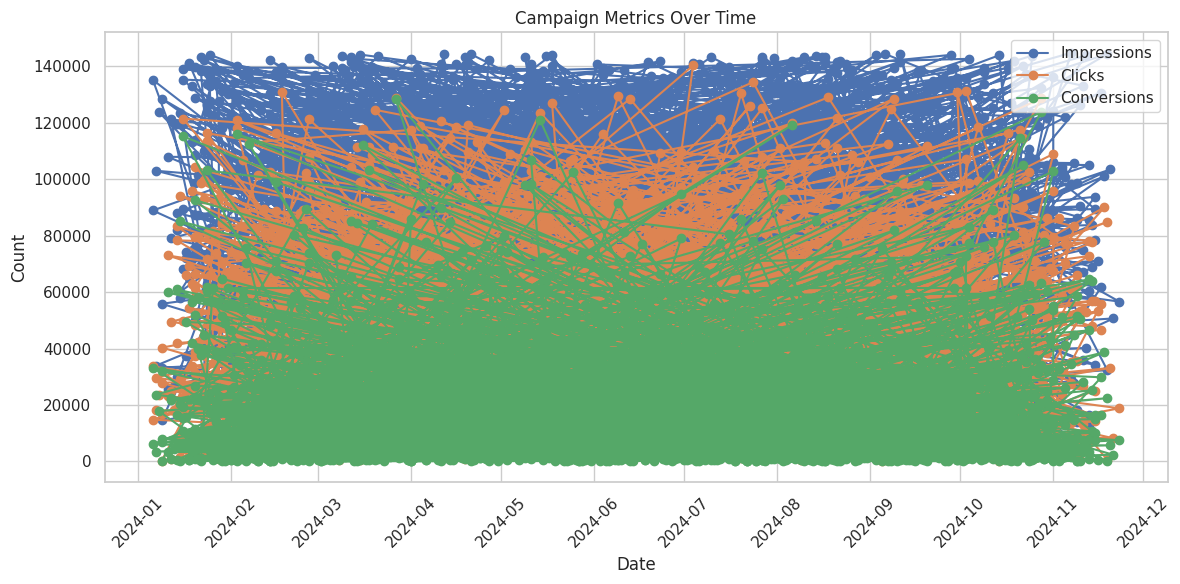

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['End_Date'], df['Impressions'], marker='o', label='Impressions')
plt.plot(df['End_Date'], df['Clicks'], marker='o', label='Clicks')
plt.plot(df['End_Date'], df['Conversions'], marker='o', label='Conversions')
plt.title('Campaign Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()